# Proyecto: Detección de patrones en una serie de datos mediante Regresión No Lineal usando Deep Neural Networks

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np

# Librería para separar datos:
from sklearn.model_selection import train_test_split

# importamos funciones para construir redes neuronales:
from tensorflow.keras import layers, models, optimizers, regularizers

## Cargamos y Exploramos datos:

In [2]:
# Cargamos dataset:
df = pd.read_csv('./Data/non_lin_data_1D.csv')
df

,features,labels
0,0,10.615287
1,1,10.411820
2,2,8.976248
3,3,9.982681
4,4,8.483438
...,...,...
995,995,5.211010
996,996,6.556664
997,997,6.617752
998,998,6.885325


## Estandarizamos features:

In [3]:
# En este caso los features son de una sola variable, 
# cuando son de varias variables estandarizamos variable por variable (ie. columna por columna)

mu = np.mean( df['features'].values )
std = np.std( df['features'].values )

# Estandarizamos: 
df['features'] = (df['features'] - mu) / std
df

,features,labels
0,-1.730320,10.615287
1,-1.726856,10.411820
2,-1.723391,8.976248
3,-1.719927,9.982681
4,-1.716463,8.483438
...,...,...
995,1.716463,5.211010
996,1.719927,6.556664
997,1.723391,6.617752
998,1.726856,6.885325


In [4]:
# Verificamos que los features esten estandarizados:
mu = np.mean( df['features'].values )
std = np.std( df['features'].values )

print('features_mean =', np.round(mu) )
print('features_std =', np.round(std) )

features_mean = 0.0
features_std = 1.0


In [5]:
# Extraemos features y labels:
features = df['features'].values
labels = df['labels'].values

features.shape

(1000,)

## Redimensionamos los features como tensores (vectores columna):

In [6]:
features = features.reshape( (len(features),1 ) )
features.shape

(1000, 1)

<Figure size 432x288 with 0 Axes>

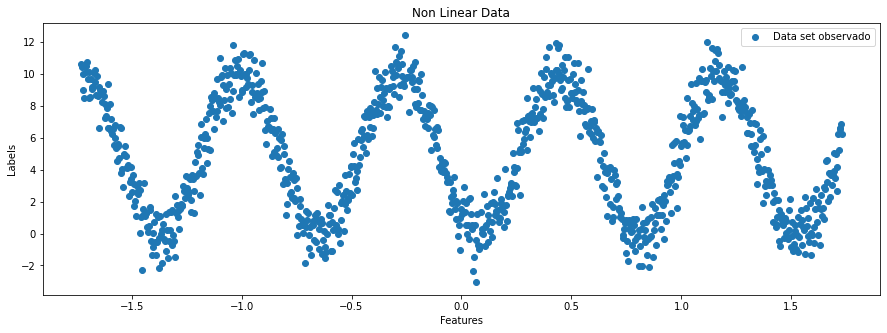

In [7]:
# Graficamos los datos:
plt.figure()
plt.figure( figsize=(15,5) )

plt.plot( df['features'] , df['labels'] ,'o', label='Data set observado')
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Non Linear Data')
plt.legend()

plt.show()

## Separamos datos para entrenamiento, validación y pruebas:

In [8]:
# Particionamos datos en entrenamiento, validacion y pruebas como sigue:

# |************************|oooooo| <-- 100%
# **** <-- Train 70%
# oooo <-- Test 30 %

# |*****************|++++++| <-- 100%
# **** <-- Train part 70%
# ++++ <-- Validation 30 %



p_train=0.7  # porcentaje para datos de entrenamiento
p_test = 0.3 # porcentaje para datos de prueba

features_train, features_test , labels_train, labels_test = train_test_split ( features , labels , train_size=p_train , test_size=p_test)

# =====================================================================
# Volvemos a particionar los datos de entrenamiento para extraer datos de validación:

features_train_part, features_val , labels_train_part, labels_val = train_test_split ( features_train , labels_train , train_size=p_train , test_size=p_test)

print('features_train_part.shape = ',features_train_part.shape)
print('features_val.shape = ',features_val.shape)
print('features_test.shape = ',features_test.shape)

features_train_part.shape =  (489, 1)
features_val.shape =  (210, 1)
features_test.shape =  (300, 1)


In [9]:
# dimensión de los features para entrenar la red:
dim_feature = features_train_part[0].shape
dim_feature

(1,)

## Construimos la red neuronal dentro de una función:

In [79]:
# Construimos la red dentro de una función:

# Parametros de entrada: 'dimension del feature' y 'learning rate'
def build_model( dim_feature , lr ):

    # numero de neuronas en cada capa:
    nn = 70 

    # Construimos arquitectura de la red:
    model = models.Sequential()
    # Capa 1 (entrada)
    model.add( layers.Dense(nn, activation='relu', input_shape=dim_feature ))
    # Capa 2
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 3
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 4
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 5
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 6    
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 7
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 8
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 9
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 10
    model.add( layers.Dense(nn, activation='relu' ))
    
    # Capa de salida (una sóla neurona sin función de activación para problemas de regresión)
    model.add( layers.Dense(1) )

    # visualzamos la arquitecura de la red:
    # model.summary()

    # optimizador:
    optim_meth = optimizers.Nadam(learning_rate=lr)

    # compilamos la red:
    model.compile(
        optimizer= optim_meth,
        loss='mse',  # <-- Función de costo a minimizar: mean square error (para problemas de regresión)
        metrics='mae'# <-- Métrica para evaluar entrenamiento: mean absolute error
        )

    return model

In [80]:
# ================= Parámetros que controlan la convergencia de la red =====================

# learning rate:
lr = 0.001

n_epochs = 50

n_batch_size = 10

# ===========================================================================================

## Declaramos la red y la entrenamos:

In [81]:
# Declaramos la red neuronal:
model = build_model(dim_feature , lr)

# Entrenamos la red:   
training = model.fit(
    features_train_part,
    labels_train_part,
    epochs=n_epochs,
    batch_size =n_batch_size,
    validation_data = (features_val, labels_val),
    verbose=0
)

In [82]:
# Extraemos las curvas de 'loss' y 'accuracy' para los datos de entrenamiento y validacion: 
loss_train_curve = training.history['loss']
accu_train_curve = training.history['mae']    

loss_valid_curve = training.history['val_loss']
accu_valid_curve = training.history['val_mae']

<Figure size 432x288 with 0 Axes>

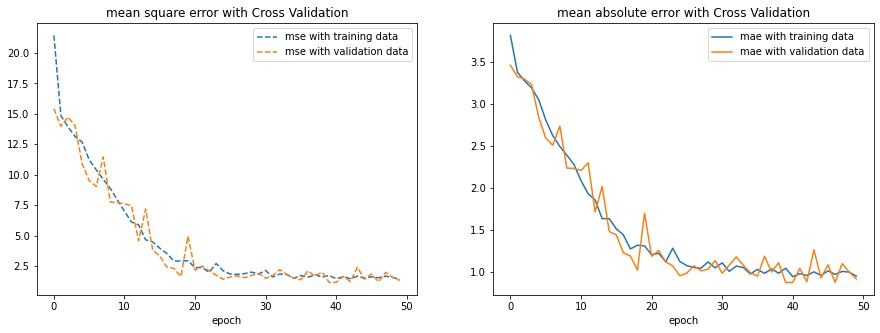

In [83]:
# Graficamos curvas:

# Eje x:
epoch = range( n_epochs )


plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epoch, loss_train_curve, '--', label='mse with training data')
plt.plot(epoch, loss_valid_curve, '--', label='mse with validation data')
plt.legend()
plt.title('mean square error with Cross Validation')
plt.xlabel('epoch')


plt.subplot(1,2,2)
plt.plot(epoch, accu_train_curve, label='mae with training data')
plt.plot(epoch, accu_valid_curve, label='mae with validation data')
plt.legend()
plt.title('mean absolute error with Cross Validation')
plt.xlabel('epoch')
plt.show()

## Evaluamnos el modelo con los datos de prueba:

In [84]:
model.evaluate(features_test, labels_test)

10/10 [==============================] - 0s 3ms/step - loss: 1.5613 - mae: 0.9733


[1.5613212585449219, 0.9733247756958008]

## Hacemos predicciones con el modelo entrenado:

In [85]:
# Predecimos las etiquetas de todos los features de prueba: 
labels_predict = model.predict(features_test)

labels_predict.shape

(300, 1)

In [86]:
# Predecimos una etiqueta en particular:

i = 10 #<--- indice del valor a predecir (< 102)

label_obs  = labels_test[i] #np.argmax(y_test[i])
label_aprx = labels_predict[i]

print('    Etiqueta real: ', label_obs )
print('Etiqueta predicha: ', label_aprx )

    Etiqueta real:  3.157976645989568
Etiqueta predicha:  [3.294659]


<Figure size 432x288 with 0 Axes>

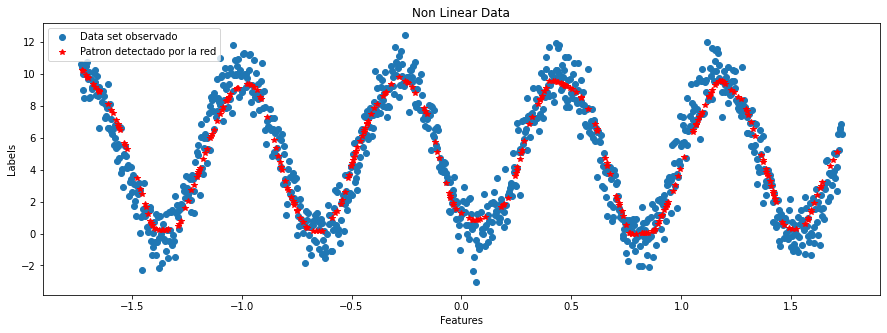

In [87]:
# Graficamos los datos:
plt.figure()
plt.figure( figsize=(15,5) )

plt.plot( features , labels ,'o' , label='Data set observado')
plt.plot( features_test , labels_predict ,'*',c='r', label='Patron detectado por la red')
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Non Linear Data')
plt.legend()

plt.show()